# Assignment #3


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** xxxx/xx/xx 23:59
- If you need any additional information, please review the assignment page on the course website.
- The items you need to answer are highlighted in red and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: [https://iust-deep-learning.github.io/981/assignments/03_transfer_learning_and_sequence_to_sequence_models](https://iust-deep-learning.github.io/981/assignments/03_transfer_learning_and_sequence_to_sequence_models)

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)


---



Fill your information here & run the cell

In [1]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id =  95521387#@param {type:"integer"}
student_name = "bardia karimi zandi" #@param {type:"string"}
Your_Github_account_Email = "bardiakarimi77@yahoo.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg03')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95521387
your name: bardia karimi zandi


# Transfer learning warm up

Pre-trained networks are networks that are already trained and stored using a lot of data. We use these networks because:
- Our data is usually not very large.
- We do not need to start the training process from scratch.


Usually, first layers in deep networks extract general features, and as we move forward in the layers, the network learns patterns more specific to the task. So if we freeze the first layers and update the weights of the last layers according to your data, the network can better learn the patterns in our data for a particular task in less time and using relatively low data.

We now want to separate ambulance classes and ordinary cars using the VGG network. To do this, we use the data you generated for the previous assignment. You must generate those data in this assignment again and split the dataset into train and test.


In [0]:
  ########################################
  #             get dataset              #
  ########################################
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

number_off_sample = 600
!pip install google_images_download
!googleimagesdownload -k "firstbus" -s medium -l 200  -o "bus" --chromedriver '/usr/lib/chromium-browser/chromedriver'
!googleimagesdownload -k "brt bus" -s medium -l 200  -o "bus" --chromedriver '/usr/lib/chromium-browser/chromedriver'
!googleimagesdownload -k "brt bus from front" -s medium -l 200  -o "bus" --chromedriver '/usr/lib/chromium-browser/chromedriver'
!googleimagesdownload -k "car in street front view" -s medium -l 600  -o "car" --chromedriver '/usr/lib/chromium-browser/chromedriver'

     |████████████████████████████████| 911kB 3.3MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/

In [0]:
print('Merging all photos in 2 folders (bus_photos and car_photos)')

!mkdir 'car_photos'
!mkdir 'bus_photos'

!cp -a 'bus/brt bus/.' 'bus_photos'
!cp -a 'bus/brt bus from front/.' 'bus_photos'
!cp -a 'bus/firstbus/.' 'bus_photos'
!cp -a 'car/car in street front view/.' 'car_photos'

!rm -r 'bus'
!rm -r 'car'


import os
import cv2
car_path = os.listdir("car_photos") 
bus_path = os.listdir("bus_photos") 

CAR_PATH = 'car_photos/'
BUS_PATH = 'bus_photos/'


!mkdir 'train'
!mkdir 'validation'

%cd 'train'
!mkdir 'bus'
!mkdir 'car'
%cd '..'

%cd 'validation'
!mkdir 'bus'
!mkdir 'car'
%cd '..'

print('Make train and validation plus resizing photos')

import random
random.shuffle(car_path)
random.shuffle(bus_path)

counter = 0
for car in car_path :
  tmp = str(CAR_PATH + car)
  if counter <= 500 :
    image =  cv2.imread(tmp)
    try:
      resized_image =  cv2.resize(image,(150,150),interpolation = cv2.INTER_AREA)
      cv2.imwrite('train/car/' + str(counter) + '.jpg',resized_image)
    except Exception :
      pass
    counter +=1 
  else :
    image =  cv2.imread(tmp)
    try:
      resized_image =  cv2.resize(image,(150,150),interpolation = cv2.INTER_AREA)
      cv2.imwrite('validation/car/' + str(counter - 500) + '.jpg',resized_image)
    except Exception :
      pass   
    counter += 1

counter = 0
for bus in bus_path :
  tmp = str(BUS_PATH + bus)
  if counter <= 500 :
    image =  cv2.imread(tmp)
    try:
      resized_image =  cv2.resize(image,(150,150),interpolation = cv2.INTER_AREA)
      cv2.imwrite('train/bus/' + str(counter) + '.jpg',resized_image)
    except Exception :
      pass   
    counter +=1 
  else :
    image =  cv2.imread(tmp)
    try:
      resized_image =  cv2.resize(image,(150,150),interpolation = cv2.INTER_AREA)
      cv2.imwrite('validation/bus/' + str(counter - 500) + '.jpg',resized_image)
    except Exception :
      pass   
    counter += 1


!rm -r 'bus_photos'
!rm -r 'car_photos'

In [0]:
from keras.optimizers import Adam
from keras import backend as K

def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

	
Now at first, we need to declare a VGG modal to extract the image features. You can see the structure and layers of the network below.
A pre-trained model can extract the features of an image itself. So at first, please do this classification task just with Features extracted from the VGG model.

In [0]:
from keras.applications import VGG16

vgg16_model = VGG16(weights='imagenet', include_top=False)
vgg16_model.summary()



Finally, implement a simple Keras model to the classification of these images.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models
from keras import layers
from keras.applications.imagenet_utils import preprocess_input
from keras import optimizers


  ########################################
  #     Put your implementation here     #
  ########################################


vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
      'train',
      target_size=(150, 150),
      batch_size=20,
      classes=['bus','car'],
      class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
      'validation',
      target_size=(150, 150),
      classes=['bus','car'],
      batch_size=20,
      class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
               metrics=["accuracy",f1,recall,precision])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Found 496 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 17s 166ms/step - loss: 0.0406 - acc: 0.9915 - f1: nan - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 2.6140e-06 - val_acc: 1.0000 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/5
100/100 [==============================] - 15s 147ms/step - loss: 2.3287e-04 - acc: 1.0000 - f1: nan - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.6229e-07 - val_acc: 1.0000 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/5
100/100 [==============================] - 15s 146ms/step - loss: 1.8182e-07 - acc: 1.0000 - f1: nan - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.1479e-07 - val_acc: 1.0000 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/5
100/100 [==============================] - 15s 151ms/step - loss: 1.0131e-07 - acc: 1.0000 - f1: nan - recall: 0.0000e+00

Next, you need to do this task with fine-tuned model. How many layers of model do you think you need to update according to your data?

Now implement fine-tuning on the model and repeat classifying data with the same model as the previous part. 

In [0]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


  ########################################
  #     Put your implementation here     #
  ########################################

for layer in vgg16_model.layers[:-1]:
    layer.trainable = False


model = models.Sequential()
model.add(vgg16_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
      'train',
      target_size=(150, 150),
      batch_size=20,
      classes=['bus','car'],
      class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
      'validation',
      target_size=(150, 150),
      classes=['bus','car'],
      batch_size=20,
      class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
               metrics=["accuracy",f1,recall,precision])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)


Found 496 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 14s 139ms/step - loss: 0.0750 - acc: 0.9845 - f1: nan - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 6.9661e-04 - val_acc: 1.0000 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/5
100/100 [==============================] - 12s 123ms/step - loss: 8.8623e-04 - acc: 0.9995 - f1: nan - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 2.3048e-06 - val_acc: 1.0000 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/5
100/100 [==============================] - 12s 123ms/step - loss: 3.7086e-05 - acc: 1.0000 - f1: nan - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.7551e-07 - val_acc: 1.0000 - val_f1: nan - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/5
100/100 [==============================] - 12s 121ms/step - loss: 1.4816e-06 - acc: 1.0000 - f1: nan - recall: 0.0000e+00

# 1. Multi objective Sequence to Sequence model

Remember the **Transfer Learning and Sequence to Sequence Model** practical class; you learned how to use a pre-trained model, and how to train a sequence to sequence model. In this task, you are going to build a sequence to sequence model by feeding English characters into your model and predicting French and Persian characters. There are some criteria that you must consider:
1. You have learned about building a character level sequence to sequence model in the [practical class](https://iust-deep-learning.github.io/981/practical/). You can review the full instruction and the code [here](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html) (We suggest practicing with [this](https://colab.research.google.com/drive/1LS0jeq6glTKoY7zRyQBvbBHmH-jKowZO) notebook before jumping to the answer). For your homework, you must implement a character-level multi-objective sequence to sequence model, which translates English texts to French and Persian Simultaneously. You can learn about building neural networks with multiple outputs [here](https://sanjayasubedi.com.np/deeplearning/multioutput-keras/).  

2. After training the model, you **must** use the prediction and test some samples, as it was provided in your practical class notebook.

3. You **must** use the dataset which was used in your practical class. For Persian translation, you must translate it from the English part by using any translation APIs such as [Google Translate](https://cloud.google.com/translate/docs/).

4. Remember saving all of your trained models under the path 'ASSIGNMENT_PATH /'.


In [0]:
!wget http://www.manythings.org/anki/fra-eng.zip
!sudo apt-get install unzip
!unzip fra-eng.zip

--2019-12-31 19:50:49--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.108.196, 104.24.109.196, 2606:4700:30::6818:6dc4, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.108.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5800008 (5.5M) [application/zip]
Saving to: ‘fra-eng.zip’

fra-eng.zip         100%[===================>]   5.53M  7.42MB/s    in 0.7s    

2019-12-31 19:50:50 (7.42 MB/s) - ‘fra-eng.zip’ saved [5800008/5800008]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Archive:  fra-eng.zip
  inflating: _about.txt              
  inflating: fra.txt                 


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import numpy as np

from pprint import pprint




TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from google.colab import files
uploaded = files.upload()
"""run this code 10 times to generate persian """
# !pip install googletrans
# from googletrans import Translator
# import time

# !wget http://www.manythings.org/anki/fra-eng.zip
# !sudo apt-get install unzip
# !unzip fra-eng.zip

# data_path = 'fra.txt'
# farsi_file = open('farsi.txt','a')
# with open(data_path, 'r') as f:
#     lines = f.read().split('\n')
# cnt = 0
# for i in range(0,1000,1):
#     line = lines[i]
#     if(cnt % 100 == 0):
#       print(cnt)
#     cnt+=1
#     input_text, _ , _ = line.split('\t')
#     translator = Translator()
#     try :
#       farsi_text = translator.translate(input_text,src = 'en',dest = 'fa').text
#     except Exception as e :
#       print(e)
#       print(cnt)
#       break
#     farsi_file.write(str(farsi_text))
#     farsi_file.write("\n")
# f.close()
# farsi_file.close()

Saving farsi.txt to farsi.txt


'run this code 10 times to generate persian '

In [0]:
num_samples = 10000  
data_path = 'fra.txt'
farsi_path = 'farsi.txt'

input_texts = []
target_texts = []
farsi_texts = []
input_characters = set()
target_characters = set()
farsi_characters = set()

with open(farsi_path , 'r') as farsi :
    farsi_lines = farsi.read().split('\n')
for line in farsi_lines:
   farsi_texts.append(line)
   for char in line :
     if char not in farsi_characters :
       farsi_characters.add(char)
with open(data_path, 'r') as f:
    lines = f.read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split('\t')
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
num_farsi_tokens = len(farsi_characters)

max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])
max_farsi_seq_length = max([len(txt) for txt in farsi_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Number of unique farsi tokens:', num_farsi_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)
print('Max sequence length for farsi:', max_farsi_seq_length)
f.close()
farsi.close()

Number of samples: 10000
Number of unique input tokens: 70
Number of unique output tokens: 93
Number of unique farsi tokens: 99
Max sequence length for inputs: 16
Max sequence length for outputs: 59
Max sequence length for farsi: 52


In [0]:
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])
farsi_token_index = dict([(char, i) for i, char in enumerate(farsi_characters)])

encoder_input_data = np.zeros((len(input_texts), max_encoder_seq_length, num_encoder_tokens),dtype='float32')
decoder_input_data = np.zeros((len(input_texts), max_decoder_seq_length, num_decoder_tokens),dtype='float32')
decoder_target_data = np.zeros((len(input_texts), max_decoder_seq_length, num_decoder_tokens), dtype='float32')
farsi_input_data = np.zeros((len(input_texts), max_farsi_seq_length, num_farsi_tokens),dtype='float32')
farsi_target_data = np.zeros((len(input_texts), max_farsi_seq_length, num_farsi_tokens), dtype='float32')


for i, (input_text, target_text,farsi_text) in enumerate(zip(input_texts, target_texts,farsi_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(target_text):
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
    for t, char in enumerate(farsi_text):
        farsi_input_data[i, t, farsi_token_index[char]] = 1.
        if t > 0:
            farsi_target_data[i, t - 1, farsi_token_index[char]] = 1.
    decoder_input_data[i, t + 1:, target_token_index[' ']] = 1.
    decoder_target_data[i, t:, target_token_index[' ']] = 1.
    farsi_input_data[i, t + 1:, farsi_token_index[' ']] = 1.
    farsi_target_data[i, t:, farsi_token_index[' ']] = 1.

In [0]:
latent_dim = 256
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')

farsi_inputs = Input(shape=(None, num_farsi_tokens))
farsi_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
farsi_outputs, _, _ = farsi_lstm(farsi_inputs,initial_state=encoder_states)
farsi_dense = Dense(num_farsi_tokens, activation='softmax')

decoder_outputs = decoder_dense(decoder_outputs)
farsi_outputs = farsi_dense(farsi_outputs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


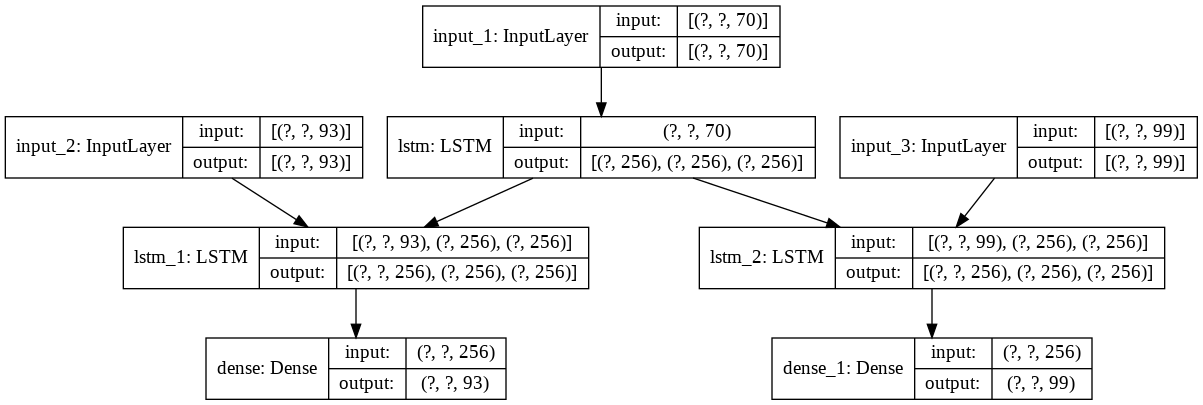

In [0]:
model = Model([encoder_inputs, decoder_inputs,farsi_inputs], [decoder_outputs,farsi_outputs])
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [0]:
# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit([encoder_input_data, decoder_input_data,farsi_input_data], [decoder_target_data,farsi_target_data],
          batch_size=64,
          epochs=20,
          validation_split=0.2)
# Save model
model.save(str(ASSIGNMENT_PATH) +'/s2s.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 27s 3ms/sample - loss: 2.2356 - dense_loss: 1.2423 - dense_1_loss: 0.9934 - dense_acc: 0.7198 - dense_1_acc: 0.7737 - val_loss: 2.1646 - val_dense_loss: 1.2232 - val_dense_1_loss: 0.9372 - val_dense_acc: 0.6961 - val_dense_1_acc: 0.7476
Epoch 2/20
8000/8000 [==============================] - 24s 3ms/sample - loss: 1.7118 - dense_loss: 0.9576 - dense_1_loss: 0.7542 - dense_acc: 0.7515 - dense_1_acc: 0.7948 - val_loss: 1.8490 - val_dense_loss: 1.0376 - val_dense_1_loss: 0.8123 - val_dense_acc: 0.7331 - val_dense_1_acc: 0.7755
Epoch 3/20
8000/8000 [==============================] - 24s 3ms/sample - loss: 1.4535 - dense_loss: 0.8073 - dense_1_loss: 0.6461 - dense_acc: 0.7836 - dense_1_acc: 0.8217 - val_loss: 1.5656 - val_dense_loss: 0.8651 - val_dense_1_loss: 0.7006 - val_dense_acc: 0.7576 - val

NameError: ignored

# 2. BERT and Word Sense Disambiguation

In computational linguistics, word-sense disambiguation (WSD) is an open problem concerned with identifying which sense of a word is used in a sentence. Imagine a bank of water, or a bank which accepts deposits. You can distinguish these two "banks" easily because you understand the context of the sentence which is used for it. What if we want to distinguish senses of a word automatically? You have learned about word embeddings and W2V from the [first assignment](https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing). W2V extracts a unique vector that is a representation of that word. That is sufficiant we are going distinguish between two different words, such as "Hi" and "Bye"; but we cannot purely depend on it when we want to distinguish between a specific word with several senses.

Researchers have developed several methods for tackling this issue. One of these techniques named DeConf is proposed by your professor, Dr. Pilehvar. He tackled this problem by de-conflating the representations of words based on the deep knowledge it derives from a semantic network. You can read the complete paper [here](https://arxiv.org/abs/1608.01961). Besides, A full survey about WSD is available [here](https://www.researchgate.net/publication/220566219_Word_Sense_Disambiguation_A_Survey).

In this task, we are going to distinguish between two senses of the word (noun) "bat" using [BERT](https://arxiv.org/abs/1810.04805). BERT is a context-aware language representation model that can produce different vectors for a specific word according to the context of the sentence.

According to [Cambridge dictionary](https://dictionary.cambridge.org/dictionary/english/bat), "bat" has two meanings:
1. A specially shaped piece of wood used for hitting the ball in some games (cricket bat)

2. A small animal like a mouse with wings that flies at night (mammal bat)



We use two simple datasets for our task. First, cricketbat.txt, which contains few sentences referring to bat used in cricket sport, and second, vampirebat.txt, which contains few sentences referring to the mammal bird bat. These datasets are available in [this](https://github.com/omkar-dsd/mini_projects/tree/master/word_sense_disambiuation) repository, which is used for another WSD approach using [Wordnet](https://wordnet.princeton.edu/). The full explanation of WSD using this method is available [here](https://towardsdatascience.com/a-simple-word-sense-disambiguation-application-3ca645c56357).

In [2]:
# Download and load the datasets here. Then, separate and lower the sentences and insert them in a list.
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving vampire.txt to vampire.txt


Saving cricket.txt to cricket.txt


In [3]:
vampire = open('vampire.txt','r')
cricket = open('cricket.txt','r')
vampires = vampire.read().split('. ')
crickets = cricket.read().split('. ')
for i in range(len(vampires)):
  vampires[i] = vampires[i].lower()
for i in range(len(crickets)):
  crickets[i] = crickets[i].lower()
print("number of vampires : " , len(vampires))
print("number of crickets : " , len(crickets))

number of vampires :  25
number of crickets :  21


Now, we use BERT to encode words of these datasets. You can use [this](https://github.com/hanxiao/bert-as-service) repository to extract word embeddings of the sentences. Use BERT-Base, Uncased as your pre-trained BERT model. Then, insert the vectors of all words with root "bat" in another list for each dataset.

In [4]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!sudo apt-get install unzip
!unzip uncased_L-12_H-768_A-12.zip

--2020-01-05 21:33:13--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   146MB/s    in 2.7s    

2020-01-05 21:33:16 (146 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Archive:  uncased_L-12_H-768_A-12.zip


In [6]:
!pip install bert-serving-server  # server
!pip install bert-serving-client  # client, independent of `bert-serving-server`
!nohup bert-serving-start -model_dir /content/uncased_L-12_H-768_A-12 &

nohup: appending output to 'nohup.out'


In [0]:
from bert_serving.client import BertClient
bc = BertClient(check_length = False)

In [0]:
encoded_vampire = bc.encode(vampires)
encoded_cricket = bc.encode(crickets)

Now, you need to find a specific embedding for each sense of the "bat". A simple approach is averaging all "bat" vectors of each document. Then, you should calculate the distance between the BERT embedding of "bat" in our test cases with your document "bat"s. 

Hint: [This](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html) function may be useful.

In [0]:
test_cases = ["bats are mammals","bats breed","bats are used to play cricket", "which bat has handle?","bats can fly"]
test_labels = ["mammal bat","mammal bat","cricket bat","cricket bat","mammal bat"]

test_cases = []
your_labels = []

#fill your labels with the "bat" with minimum distance to the test case

assert test_labels==your_labels

Hmm... It makes sense. Let's see what you produced. You should use [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) to compress the 768 dimensions of BERT embeddings into just 2 dimensions. Then, use matplotlib to visualize them.

No handles with labels found to put in legend.


[0.03358502 0.18059567]


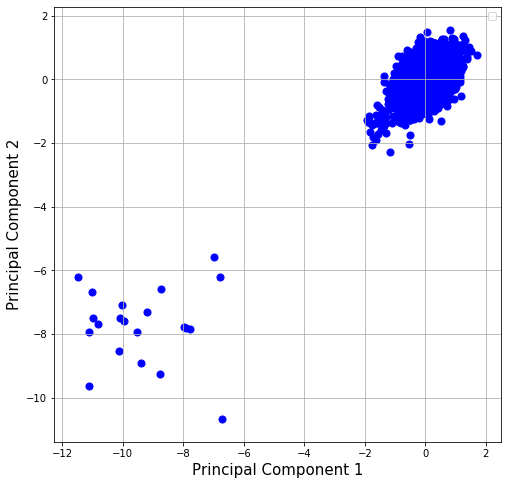

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD

# make a list of embeddings like this: [ALL_CRICKET_BAT_EMBEDDINGS,ALL_MAMMAL_BAT_EMBEDDINGS,AVERAGE_CRICKET_BAT_EMBEDDING,AVERAGE_MAMMAL_BAT_EMBEDDING,ALL_TEST_BAT_EMBEDDINS]
vec_all = encoded_cricket + encoded_vampire[:21] + encoded_cricket/21 + encoded_vampire[:21]/21  
pca = TruncatedSVD(n_components=2)
principalComponents = pca.fit_transform(vec_all)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data=principalComponents
                           , columns=['principal component 1', 'principal component 2'])



# make a colors list. use "b" for CRICKET_BATs, "r" for MAMMAL_BATs
colors =[]
for i in range(25):
  colors.append('b')
for i in range(251):
  colors.append('r')

#extract pc1 and pc2 for document bats
pc1_document=encoded_cricket
pc2_document=encoded_vampire

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_document,pc2_document, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

It seems that despite this considerable compression, the clusters are distinguishable. Now, for the last part, visualize the average vectors and the test case vectors.

In [0]:
#extract pc1 and pc2 for average and test bats
pc1_remainings=[]
pc2_remainings=[]

colors =["b","r","m","m","c","c","m"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_remainings,pc2_remainings, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg03__xx__xx.zip`) and submit it via [https://forms.gle/W8AMoNffho8TQLB87](https://forms.gle/W8AMoNffho8TQLB87).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [0]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_03'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg03__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 03 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

github.com username: bardiakzzzz
github.com password for bardiakzzzz (never stored): 
.login	bardiakzzzz
.id	39650433
.node_id	MDQ6VXNlcjM5NjUwNDMz
.avatar_url	https://avatars0.githubusercontent.com/u/39650433?v=4
.gravatar_id	
.url	https://api.github.com/users/bardiakzzzz
.html_url	https://github.com/bardiakzzzz
.followers_url	https://api.github.com/users/bardiakzzzz/followers
.following_url	https://api.github.com/users/bardiakzzzz/following{/other_user}
.gists_url	https://api.github.com/users/bardiakzzzz/gists{/gist_id}
.starred_url	https://api.github.com/users/bardiakzzzz/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/bardiakzzzz/subscriptions
.organizations_url	https://api.github.com/users/bardiakzzzz/orgs
.repos_url	https://api.github.com/users/bardiakzzzz/repos
.events_url	https://api.github.com/users/bardiakzzzz/events{/privacy}
.received_events_url	https://api.github.com/users/bardiakzzzz/received_events
.type	User
.site_admin	false
.name	
.company	
.blo

## Download Submission (Run the cell)

In [0]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg03_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.